In [1]:
# Created By Mohsen Naghipourfar

%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/fpkm_normalized.csv', header=None)
labels = pd.read_csv('../Data/disease.csv', header=None)
results = pd.read_csv('../New Results/Results/CSVs/result_200.csv', header=None)

# classfication_data[0] = classfication_data[0].apply(lambda x: x + .01)
# classfication_data.head()
# mutual_info_score(labels_pred)

In [3]:
random_feature_indices = np.random.choice(19671, 50, replace=False)
x_train = data[random_feature_indices]
x_train.columns = [i for i in range(x_train.shape[1])]

y_dummies = pd.get_dummies(labels[0])
del y_dummies[y_dummies.columns[-1]]
new_data = pd.concat([x_train, y_dummies], axis=1)
# del df_new['color_head']
x_train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

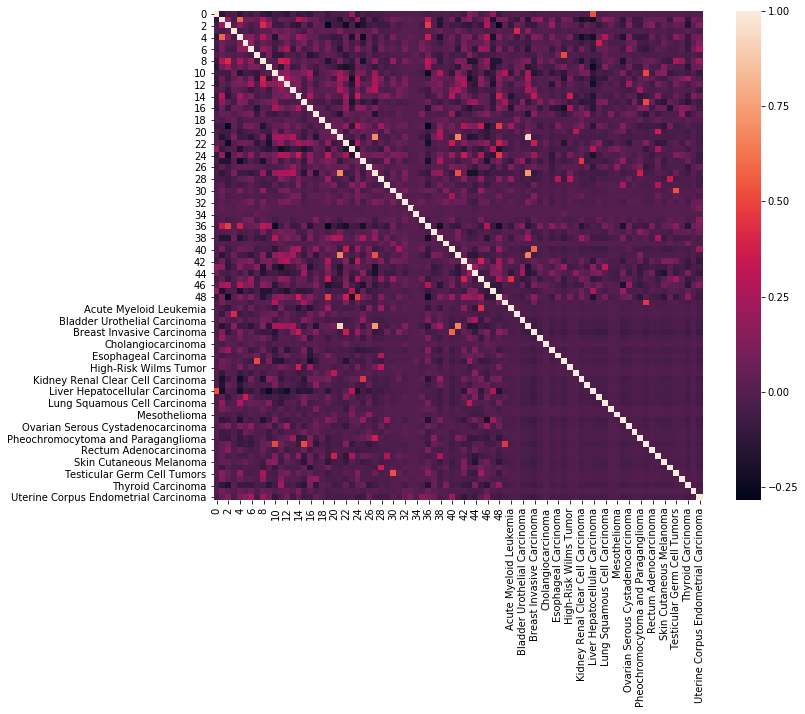

In [4]:
corr_matrix = new_data.corr()
# correlation_matrix = np.corrcoef(new_data.values)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.savefig('./heatmap.png')

In [42]:
mutual_matrix = mutual_info_classif(x_train, labels[0])
mutual_matrix
# mutual_matrix.sort()
# mutual_matrix
# y Correlation Matrix
# k = 20 # Number of Variables for Heatmap
# cols = corr_matrix.nlargest(k, 'y')['y'].index
# cols = corr_matrix.nlargest(k, '').index
# cm = np.corrcoef(data[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()


array([0.16976246, 0.05514267, 0.18901962, 0.36598234, 0.29083708,
       0.37250025, 0.18772223, 0.17110942, 0.18736867, 0.48140335,
       0.22870098, 0.10236291, 0.27378316, 0.38799894, 0.33249655,
       0.19259724, 0.18400052, 0.47965551, 0.16065221, 0.30315897,
       0.23895952, 0.26715699, 0.2862001 , 0.30574413, 0.35920758,
       0.2283795 , 0.15214304, 0.06063532, 0.47623721, 0.41060524,
       0.39513272, 0.21254114, 0.0255937 , 0.25889742, 0.12942385,
       0.11757993, 0.35462987, 0.16307701, 0.4400207 , 0.30597849,
       0.46518713, 0.47345893, 0.21874149, 0.11536595, 0.3331788 ,
       0.10958389, 0.33497041, 0.27212613, 0.51402127, 0.1886311 ,
       0.23675866, 0.14944699, 0.30351875, 0.18216983, 0.1453421 ,
       0.10733942, 0.28213304, 0.4467408 , 0.13206351, 0.29011595,
       0.39792755, 0.40460238, 0.20992808, 0.16348073, 0.17975264,
       0.20206778, 0.19575798, 0.11007523, 0.15139734, 0.25592109,
       0.2078694 , 0.52277278, 0.29468201, 0.17995081, 0.10114

In [6]:
# Boxplots: Feature-Label plot

# facet = sns.lmplot(data=data_to_plot, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

# for label in labels[0].value_counts().index:

#     for l, row in data_to_plot.loc[data_to_plot['label']==label,:].iterrows():
    
#         #add the data point as text
#         plt.annotate(row['label'], 
#                      (row['x'], row['y']),
#                      horizontalalignment='center',
#                      verticalalignment='center',
#                      size=11) 
# sns.swarmplot(x="x", y="y", data=data_to_plot, linewidth=0.1)
for i in range(x_train.shape[1]):
    data_to_plot = pd.concat([x_train[[i]], labels], axis=1)
    data_to_plot.columns = ['feature', 'label']
    plt.xticks(rotation=90)
    sns.boxplot(x='label', y='feature', data=data_to_plot)
    plt.ylabel('feature {0}'.format(random_feature_indices[i]))
    plt.savefig('./Plots/box_{0}'.format(random_feature_indices[i]))
    plt.close()